In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# Load the data

path = "Predictions/DifferentQualities/M/lungs.csv"
lungs_m = pd.read_csv(path)
path = "Predictions/DifferentQualities/M/heart.csv"
heart_m = pd.read_csv(path)

aux_heart = heart_m.drop(columns = ['Dice Heart'])
lungs_m = pd.concat([lungs_m, aux_heart], axis = 0)

path = "Predictions/DifferentQualities/M/rca_lungs.csv"
rca_lungs_m = pd.read_csv(path)
path = "Predictions/DifferentQualities/M/rca_heart.csv"
rca_heart_m = pd.read_csv(path)

aux_heart = rca_heart_m.drop(columns = ['Dice Heart'])
rca_lungs_m = pd.concat([rca_lungs_m, aux_heart], axis = 0)

path = "Predictions/DifferentQualities/M/rca_lungs_max.csv"
rca_lungs_max_m = pd.read_csv(path)
path = "Predictions/DifferentQualities/M/rca_heart_max.csv"
rca_heart_max_m = pd.read_csv(path)

aux_heart = rca_heart_max_m.drop(columns = ['Dice Heart'])
rca_lungs_max_m = pd.concat([rca_lungs_max_m, aux_heart], axis = 0)

# Now F 

path = "Predictions/DifferentQualities/F/lungs.csv"
lungs_f = pd.read_csv(path)
path = "Predictions/DifferentQualities/F/heart.csv"
heart_f = pd.read_csv(path)

aux_heart = heart_f.drop(columns = ['Dice Heart'])
lungs_f = pd.concat([lungs_f, aux_heart], axis = 0)

path = "Predictions/DifferentQualities/F/rca_lungs.csv"
rca_lungs_f = pd.read_csv(path)
path = "Predictions/DifferentQualities/F/rca_heart.csv"
rca_heart_f = pd.read_csv(path)

aux_heart = rca_heart_f.drop(columns = ['Dice Heart'])
rca_lungs_f = pd.concat([rca_lungs_f, aux_heart], axis = 0)

path = "Predictions/DifferentQualities/F/rca_lungs_max.csv"
rca_lungs_max_f = pd.read_csv(path)
path = "Predictions/DifferentQualities/F/rca_heart_max.csv"
rca_heart_max_f = pd.read_csv(path)

aux_heart = rca_heart_max_f.drop(columns = ['Dice Heart'])
rca_lungs_max_f = pd.concat([rca_lungs_max_f, aux_heart], axis = 0)

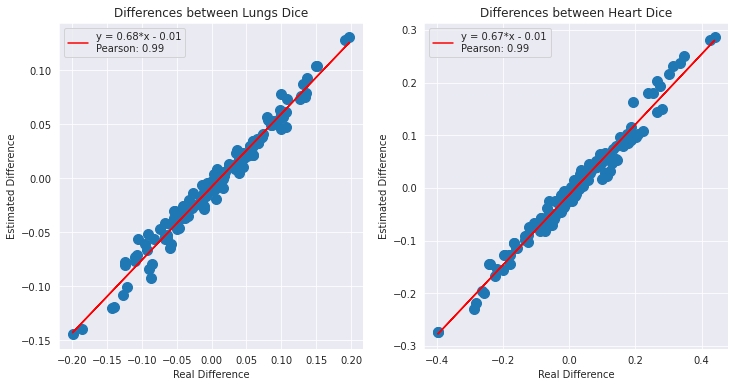

In [3]:
import numpy as np 

from scipy.stats import linregress, pearsonr

unique_epochs = lungs_m['Model'].unique()

points = []

for epoch in unique_epochs:
    lungs_m_epoch = lungs_m[lungs_m['Model'] == epoch]
    rca_lungs_m_epoch = rca_lungs_m[rca_lungs_m['Model'] == epoch]    
    dice_lungs_m_epoch = lungs_m_epoch['Dice Lungs'].mean()
    dice_rca_lungs_m_epoch = rca_lungs_m_epoch['Dice Lungs'].mean()
    
    for epoch in unique_epochs:
        lungs_f_epoch = lungs_f[lungs_f['Model'] == epoch]
        rca_lungs_f_epoch = rca_lungs_f[rca_lungs_f['Model'] == epoch]
        dice_lungs_f_epoch = lungs_f_epoch['Dice Lungs'].mean()
        dice_rca_lungs_f_epoch = rca_lungs_f_epoch['Dice Lungs'].mean()
        
        dif_real = dice_lungs_m_epoch - dice_lungs_f_epoch
        dif_est = dice_rca_lungs_m_epoch - dice_rca_lungs_f_epoch
        
        points.append([dif_real, dif_est])
    
points = np.array(points)

pointsheart = []

for epoch in unique_epochs:
    heart_m_epoch = heart_m[heart_m['Model'] == epoch]
    rca_heart_m_epoch = rca_heart_m[rca_heart_m['Model'] == epoch]    
    dice_heart_m_epoch = heart_m_epoch['Dice Heart'].mean()
    dice_rca_heart_m_epoch = rca_heart_m_epoch['Dice Heart'].mean()
    
    for epoch in unique_epochs:
        heart_f_epoch = heart_f[heart_f['Model'] == epoch]
        rca_heart_f_epoch = rca_heart_f[rca_heart_f['Model'] == epoch]    
        dice_heart_f_epoch = heart_f_epoch['Dice Heart'].mean()
        dice_rca_heart_f_epoch = rca_heart_f_epoch['Dice Heart'].mean()
        
        dif_real = dice_heart_m_epoch - dice_heart_f_epoch
        dif_est = dice_rca_heart_m_epoch - dice_rca_heart_f_epoch
        
        pointsheart.append([dif_real, dif_est])
    
pointsheart = np.array(pointsheart)

plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.scatter(points[:, 0], points[:, 1], s = 100)
plt.xlabel('Real Difference')
plt.ylabel('Estimated Difference')
plt.title('Differences between Lungs Dice')

# Perform linear regression
slope, intercept, r_value, _, _ = linregress(points[:, 0], points[:, 1])

# Calculate Pearson coefficient
pearson_coeff, _ = pearsonr(points[:, 0], points[:, 1])

# Plot the fitted line
x = points[:, 0]
y = slope * x + intercept
if intercept > 0:
    plt.plot(x, y, color='red', label=f'y = {slope:.2f}*x + {intercept:.2f}\nPearson: {pearson_coeff:.2f}')
else:
    plt.plot(x, y, color='red', label=f'y = {slope:.2f}*x - {abs(intercept):.2f}\nPearson: {pearson_coeff:.2f}')
    
plt.legend()

plt.subplot(1,2,2)
plt.scatter(pointsheart[:, 0], pointsheart[:, 1], s = 100)
plt.xlabel('Real Difference')
plt.ylabel('Estimated Difference')
plt.title('Differences between Heart Dice')

# Perform linear regression
slope, intercept, r_value, _, _ = linregress(pointsheart[:, 0], pointsheart[:, 1])

# Calculate Pearson coefficient
pearson_coeff, _ = pearsonr(pointsheart[:, 0], pointsheart[:, 1])

# Plot the fitted line
x = pointsheart[:, 0]
y = slope * x + intercept
if intercept > 0:
    plt.plot(x, y, color='red', label=f'y = {slope:.2f}*x + {intercept:.2f}\nPearson: {pearson_coeff:.2f}')
else:
    plt.plot(x, y, color='red', label=f'y = {slope:.2f}*x - {abs(intercept):.2f}\nPearson: {pearson_coeff:.2f}')
    
plt.legend()

plt.savefig('Differences.png', dpi = 300)


In [4]:
compare = points > 0

compare = compare.astype('int')
compared = compare[:, 0] == compare[:, 1]

acc = compared.sum() / len(compared)
print(f"Accuracy Lungs: {round(acc,2)}")
print(f"Number of points: {len(compared)}")

compare = pointsheart > 0

compare = compare.astype('int')
compared = compare[:, 0] == compare[:, 1]

acc = compared.sum() / len(compared)
print(f"Accuracy Heart: {round(acc,2)}")
print(f"Number of points: {len(compared)}")

Accuracy Lungs: 0.9
Number of points: 144
Accuracy Heart: 0.92
Number of points: 144


In [5]:
maskrows = np.abs(points) < 0.01
maskrows = maskrows.astype('int')
maskrows = maskrows.sum(axis = 1) != 2

compare = points[maskrows] > 0

compare = compare.astype('int')
compared = compare[:, 0] == compare[:, 1]

acc = compared.sum() / len(compared)
print(f"Accuracy Lungs: {round(acc,2)}")
print(f"Number of points: {len(compared)}")

maskrows = np.abs(pointsheart) < 0.01
maskrows = maskrows.astype('int')
maskrows = maskrows.sum(axis = 1) != 2

compare = pointsheart[maskrows] > 0

compare = compare.astype('int')
compared = compare[:, 0] == compare[:, 1]

acc = compared.sum() / len(compared)
print(f"Accuracy Heart: {round(acc,2)}")
print(f"Number of points: {len(compared)}")

Accuracy Lungs: 0.96
Number of points: 130
Accuracy Heart: 0.92
Number of points: 141


In [6]:
maskrows = np.abs(points) < 0.02
maskrows = maskrows.astype('int')
maskrows = maskrows.sum(axis = 1) != 2

compare = points[maskrows] > 0

compare = compare.astype('int')
compared = compare[:, 0] == compare[:, 1]

acc = compared.sum() / len(compared)
print(f"Accuracy Lungs: {round(acc,2)}")
print(f"Number of points: {len(compared)}")

maskrows = np.abs(pointsheart) < 0.02
maskrows = maskrows.astype('int')
maskrows = maskrows.sum(axis = 1) != 2

compare = pointsheart[maskrows] > 0

compare = compare.astype('int')
compared = compare[:, 0] == compare[:, 1]

acc = compared.sum() / len(compared)
print(f"Accuracy Heart: {round(acc,2)}")
print(f"Number of points: {len(compared)}")

Accuracy Lungs: 1.0
Number of points: 110
Accuracy Heart: 0.96
Number of points: 131


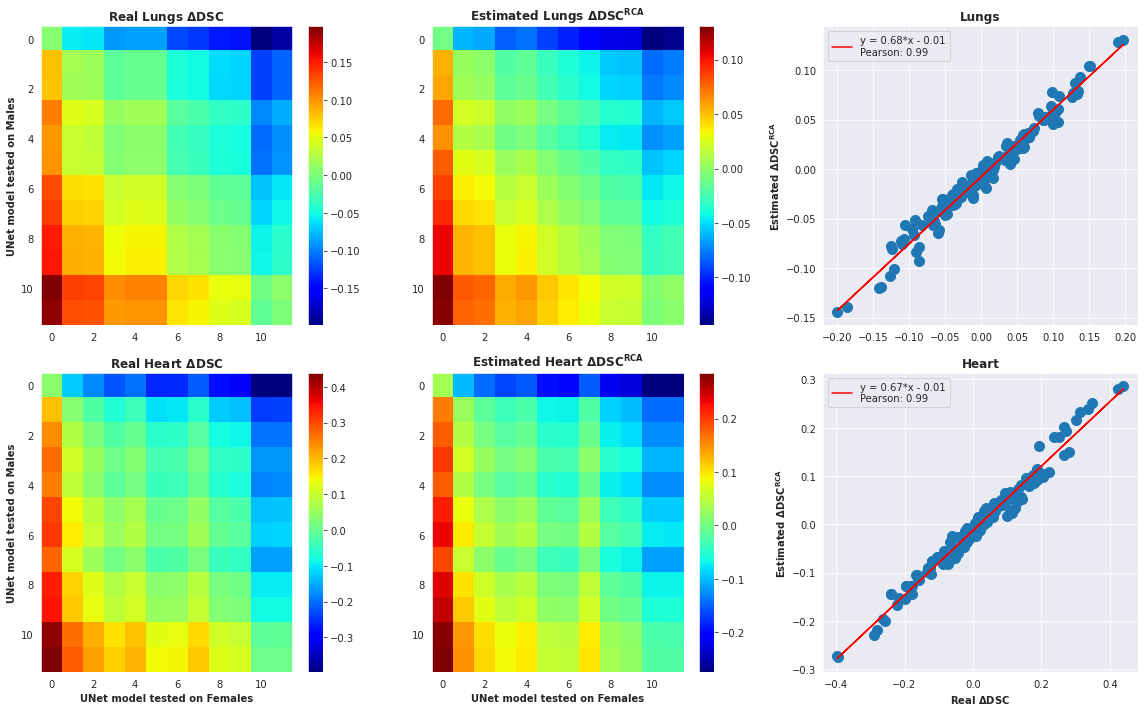

In [7]:
import numpy as np 

unique_epochs = lungs_m['Model'].unique()

array_real = np.zeros((len(unique_epochs), len(unique_epochs)))
array_rca = np.zeros((len(unique_epochs), len(unique_epochs)))

for i in range(len(unique_epochs)):
    epoch = "epoch%d" % i
    
    lungs_m_epoch = lungs_m[lungs_m['Model'] == epoch]
    rca_lungs_m_epoch = rca_lungs_m[rca_lungs_m['Model'] == epoch]    
    dice_lungs_m_epoch = lungs_m_epoch['Dice Lungs'].mean()
    dice_rca_lungs_m_epoch = rca_lungs_m_epoch['Dice Lungs'].mean()
    
    for j in range(len(unique_epochs)):
        epoch = "epoch%d" % j
        
        lungs_f_epoch = lungs_f[lungs_f['Model'] == epoch]
        rca_lungs_f_epoch = rca_lungs_f[rca_lungs_f['Model'] == epoch]
        dice_lungs_f_epoch = lungs_f_epoch['Dice Lungs'].mean()
        dice_rca_lungs_f_epoch = rca_lungs_f_epoch['Dice Lungs'].mean()
        
        dif_real = dice_lungs_m_epoch - dice_lungs_f_epoch
        dif_est = dice_rca_lungs_m_epoch - dice_rca_lungs_f_epoch
        
        array_real[i, j] = dif_real
        array_rca[i, j] = dif_est

plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

plt.figure(figsize = (16, 10))

plt.subplot(2,3,1)
plt.imshow(array_real, cmap = 'jet', aspect="auto")
#plt.colorbar(fraction=0.046, pad=0.04)
plt.colorbar()
plt.title('Real Lungs $\mathregular{\Delta DSC}$')
plt.grid(False)
plt.xlabel('')
plt.ylabel('UNet model tested on Males')
# set colormap range
#plt.clim(-0.2, 0.2)

# remove grid

plt.subplot(2,3,2)
plt.imshow(array_rca, cmap = 'jet', aspect="auto")
#plt.colorbar(fraction=0.046, pad=0.04)
plt.colorbar()
plt.title('Estimated Lungs $\mathregular{\Delta DSC^{RCA}}$')
plt.grid(False)
plt.xlabel('')
plt.ylabel('')
#plt.clim(-0.2, 0.2)

unique_epochs = heart_m['Model'].unique()

array_real = np.zeros((len(unique_epochs), len(unique_epochs)))
array_rca = np.zeros((len(unique_epochs), len(unique_epochs)))

for i in range(len(unique_epochs)):
    epoch = "epoch%d" % i
    
    lungs_m_epoch = heart_m[heart_m['Model'] == epoch]
    rca_lungs_m_epoch = rca_heart_m[rca_heart_m['Model'] == epoch]    
    dice_lungs_m_epoch = lungs_m_epoch['Dice Heart'].mean()
    dice_rca_lungs_m_epoch = rca_lungs_m_epoch['Dice Heart'].mean()
    
    for j in range(len(unique_epochs)):
        epoch = "epoch%d" % j
        
        lungs_f_epoch = heart_f[heart_f['Model'] == epoch]
        rca_lungs_f_epoch = rca_heart_f[rca_heart_f['Model'] == epoch]
        dice_lungs_f_epoch = lungs_f_epoch['Dice Heart'].mean()
        dice_rca_lungs_f_epoch = rca_lungs_f_epoch['Dice Heart'].mean()
        
        dif_real = dice_lungs_m_epoch - dice_lungs_f_epoch
        dif_est = dice_rca_lungs_m_epoch - dice_rca_lungs_f_epoch
        
        array_real[i, j] = dif_real
        array_rca[i, j] = dif_est
        
plt.subplot(2,3,4)
plt.imshow(array_real, cmap = 'jet', aspect="auto")
#plt.colorbar(fraction=0.046, pad=0.04)
plt.colorbar()
plt.title('Real Heart $\mathregular{\Delta DSC}$')
plt.grid(False)
plt.xlabel('UNet model tested on Females')
plt.ylabel('UNet model tested on Males')
# set colormap range
#plt.clim(-0.2, 0.2)

# remove grid

plt.subplot(2,3,5)
plt.imshow(array_rca, cmap = 'jet', aspect="auto")
#plt.colorbar(fraction=0.046, pad=0.04)
plt.colorbar()

plt.title('Estimated Heart $\mathregular{\Delta DSC^{RCA}}$')
plt.grid(False)
plt.xlabel('UNet model tested on Females')
plt.ylabel('')
#plt.clim(-0.2, 0.2)

plt.subplot(2,3,3)
plt.scatter(points[:, 0], points[:, 1], s = 100)
plt.xlabel('')
plt.ylabel('Estimated $\mathregular{\Delta DSC^{RCA}}$')
plt.title('Lungs')

# Perform linear regression
slope, intercept, r_value, _, _ = linregress(points[:, 0], points[:, 1])

# Calculate Pearson coefficient
pearson_coeff, _ = pearsonr(points[:, 0], points[:, 1])

# Plot the fitted line
x = points[:, 0]
y = slope * x + intercept
if intercept > 0:
    plt.plot(x, y, color='red', label=f'y = {slope:.2f}*x + {intercept:.2f}\nPearson: {pearson_coeff:.2f}')
else:
    plt.plot(x, y, color='red', label=f'y = {slope:.2f}*x - {abs(intercept):.2f}\nPearson: {pearson_coeff:.2f}')
    
plt.legend()

plt.subplot(2,3,6)
plt.scatter(pointsheart[:, 0], pointsheart[:, 1], s = 100)
plt.xlabel('Real $\mathregular{\Delta DSC}$')
plt.ylabel('Estimated $\mathregular{\Delta DSC^{RCA}}$')
plt.title('Heart')

# Perform linear regression
slope, intercept, r_value, _, _ = linregress(pointsheart[:, 0], pointsheart[:, 1])

# Calculate Pearson coefficient
pearson_coeff, _ = pearsonr(pointsheart[:, 0], pointsheart[:, 1])

# Plot the fitted line
x = pointsheart[:, 0]
y = slope * x + intercept
if intercept > 0:
    plt.plot(x, y, color='red', label=f'y = {slope:.2f}*x + {intercept:.2f}\nPearson: {pearson_coeff:.2f}')
else:
    plt.plot(x, y, color='red', label=f'y = {slope:.2f}*x - {abs(intercept):.2f}\nPearson: {pearson_coeff:.2f}')
    
plt.legend()

plt.tight_layout()
plt.savefig('figure2.png', dpi = 300)